In [388]:
##importing the libraries
import pandas as pd
import numpy as np
import nltk
import string
!pip install contractions
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer


In [389]:
##importing pandas and the csv file
import pandas as pd
df = pd.DataFrame()

df = pd.read_csv (r'C:\Users\Latika\Desktop\Exam_MB210_2022_data file needed for the exam.csv', sep=",")
print (df)

         budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801          0                                                 []   
4802          0                [{"id": 99, "name": "Documentary"}]   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          http://disney.

In [390]:
df.isnull()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4799,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4800,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4801,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [391]:
df.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False]])

In [392]:
df_new = df.notnull()

In [393]:
df.dropna()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,"[{""id"": 35, ""name"": ""Comedy""}]",http://www.miramax.com/movie/clerks/,2292,"[{""id"": 1361, ""name"": ""salesclerk""}, {""id"": 30...",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-09-13,3151130,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just because they serve you doesn't mean they ...,Clerks,7.4,755
4781,22000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",https://www.facebook.com/DrySpellMovie,255266,"[{""id"": 13043, ""name"": ""dating""}, {""id"": 15160...",en,Dry Spell,Sasha tries to get her soon-to-be ex husband K...,0.048948,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-02-14,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Getting divorced does funny things to a girl,Dry Spell,6.0,1
4791,13,"[{""id"": 27, ""name"": ""Horror""}]",http://tincanmanthemovie.com/,157185,"[{""id"": 14903, ""name"": ""home invas

In [394]:
for col in df.columns:
    print(col, df[col].isnull().sum())

budget 0
genres 0
homepage 3091
id 0
keywords 0
original_language 0
original_title 0
overview 3
popularity 0
production_companies 0
production_countries 0
release_date 1
revenue 0
runtime 2
spoken_languages 0
status 0
tagline 844
title 0
vote_average 0
vote_count 0


In [395]:
df.get('title')

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4798                                 El Mariachi
4799                                   Newlyweds
4800                   Signed, Sealed, Delivered
4801                            Shanghai Calling
4802                           My Date with Drew
Name: title, Length: 4803, dtype: object

In [396]:
df.get('vote_average')

0       7.2
1       6.9
2       6.3
3       7.6
4       6.1
       ... 
4798    6.6
4799    5.9
4800    7.0
4801    5.7
4802    6.3
Name: vote_average, Length: 4803, dtype: float64

In [397]:
rws = df.loc[:, ['tagline','title','vote_average', 'genres']]

In [398]:
print(rws.head())

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  \
0                                    Avatar           7.2   
1  Pirates of the Caribbean: At World's End           6.9   
2                                   Spectre           6.3   
3                     The Dark Knight Rises           7.6   
4                               John Carter           6.1   

                                              genres  
0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  
1  [{"id": 12, "name": "Adventure"}, {"id": 14, "...  
2  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  
3  [{"id": 28, "name": "Action"}, {"id": 80, "nam...  
4  [{"id": 28, "name": "Action"}, {"id"

In [399]:
rws_new = rws[rws['tagline'].notnull()]

In [400]:
#library that contains punctuation
import string
rws_new['no_contract'] = rws_new['tagline'].apply(lambda x: [contractions.fix(word) for word in x.split()])
rws_new.head()

<ipython-input-400-3a9c3bbf2a11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rws_new['no_contract'] = rws_new['tagline'].apply(lambda x: [contractions.fix(word) for word in x.split()])


,tagline,title,vote_average,genres,no_contract
0,Enter the World of Pandora.,Avatar,7.2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Enter, the, World, of, Pandora.]"
1,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[At, the, end, of, the, world,, the, adventure..."
2,A Plan No One Escapes,Spectre,6.3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[A, Plan, No, One, Escapes]"
3,The Legend Ends,The Dark Knight Rises,7.6,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[The, Legend, Ends]"
4,"Lost in our world, found in another.",John Carter,6.1,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Lost, in, our, world,, found, in, another.]"


In [401]:
rws_new['tagline_str'] = [' '.join(map(str, l)) for l in rws_new['no_contract']]
rws_new.head()

<ipython-input-401-7b758eac2290>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rws_new['tagline_str'] = [' '.join(map(str, l)) for l in rws_new['no_contract']]


,tagline,title,vote_average,genres,no_contract,tagline_str
0,Enter the World of Pandora.,Avatar,7.2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Enter, the, World, of, Pandora.]",Enter the World of Pandora.
1,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[At, the, end, of, the, world,, the, adventure...","At the end of the world, the adventure begins."
2,A Plan No One Escapes,Spectre,6.3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[A, Plan, No, One, Escapes]",A Plan No One Escapes
3,The Legend Ends,The Dark Knight Rises,7.6,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[The, Legend, Ends]",The Legend Ends
4,"Lost in our world, found in another.",John Carter,6.1,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Lost, in, our, world,, found, in, another.]","Lost in our world, found in another."


In [402]:
##tokenization
rws_new['tokenized_tagline'] = rws_new['tagline_str'].apply(word_tokenize)
rws_new.head()

<ipython-input-402-98443ac75144>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rws_new['tokenized_tagline'] = rws_new['tagline_str'].apply(word_tokenize)


,tagline,title,vote_average,genres,no_contract,tagline_str,tokenized_tagline
0,Enter the World of Pandora.,Avatar,7.2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Enter, the, World, of, Pandora.]",Enter the World of Pandora.,"[Enter, the, World, of, Pandora, .]"
1,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[At, the, end, of, the, world,, the, adventure...","At the end of the world, the adventure begins.","[At, the, end, of, the, world, ,, the, adventu..."
2,A Plan No One Escapes,Spectre,6.3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[A, Plan, No, One, Escapes]",A Plan No One Escapes,"[A, Plan, No, One, Escapes]"
3,The Legend Ends,The Dark Knight Rises,7.6,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[The, Legend, Ends]",The Legend Ends,"[The, Legend, Ends]"
4,"Lost in our world, found in another.",John Carter,6.1,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Lost, in, our, world,, found, in, another.]","Lost in our world, found in another.","[Lost, in, our, world, ,, found, in, another, .]"


In [403]:
rws_new['lower_tagline'] = rws_new['tokenized_tagline'].apply(lambda x: [word.lower() for word in x])
rws_new.head()

<ipython-input-403-49786af1fb5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rws_new['lower_tagline'] = rws_new['tokenized_tagline'].apply(lambda x: [word.lower() for word in x])


,tagline,title,vote_average,genres,no_contract,tagline_str,tokenized_tagline,lower_tagline
0,Enter the World of Pandora.,Avatar,7.2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Enter, the, World, of, Pandora.]",Enter the World of Pandora.,"[Enter, the, World, of, Pandora, .]","[enter, the, world, of, pandora, .]"
1,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[At, the, end, of, the, world,, the, adventure...","At the end of the world, the adventure begins.","[At, the, end, of, the, world, ,, the, adventu...","[at, the, end, of, the, world, ,, the, adventu..."
2,A Plan No One Escapes,Spectre,6.3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[A, Plan, No, One, Escapes]",A Plan No One Escapes,"[A, Plan, No, One, Escapes]","[a, plan, no, one, escapes]"
3,The Legend Ends,The Dark Knight Rises,7.6,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[The, Legend, Ends]",The Legend Ends,"[The, Legend, Ends]","[the, legend, ends]"
4,"Lost in our world, found in another.",John Carter,6.1,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Lost, in, our, world,, found, in, another.]","Lost in our world, found in another.","[Lost, in, our, world, ,, found, in, another, .]","[lost, in, our, world, ,, found, in, another, .]"


In [404]:
rws_new['no_contract_title'] = rws_new['title'].apply(lambda x: [contractions.fix(word) for word in x.split()])
rws_new['title_str'] = [' '.join(map(str, l)) for l in rws_new['no_contract_title']]
rws_new.head()


<ipython-input-404-1833c4973850>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rws_new['no_contract_title'] = rws_new['title'].apply(lambda x: [contractions.fix(word) for word in x.split()])
<ipython-input-404-1833c4973850>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rws_new['title_str'] = [' '.join(map(str, l)) for l in rws_new['no_contract_title']]


,tagline,title,vote_average,genres,no_contract,tagline_str,tokenized_tagline,lower_tagline,no_contract_title,title_str
0,Enter the World of Pandora.,Avatar,7.2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Enter, the, World, of, Pandora.]",Enter the World of Pandora.,"[Enter, the, World, of, Pandora, .]","[enter, the, world, of, pandora, .]",[Avatar],Avatar
1,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[At, the, end, of, the, world,, the, adventure...","At the end of the world, the adventure begins.","[At, the, end, of, the, world, ,, the, adventu...","[at, the, end, of, the, world, ,, the, adventu...","[Pirates, of, the, Caribbean:, At, World's, End]",Pirates of the Caribbean: At World's End
2,A Plan No One Escapes,Spectre,6.3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[A, Plan, No, One, Escapes]",A Plan No One Escapes,"[A, Plan, No, One, Escapes]","[a, plan, no, one, escapes]",[Spectre],Spectre
3,The Legend Ends,The Dark Knight Rises,7.6,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[The, Legend, Ends]",The Legend Ends,"[The, Legend, Ends]","[the, legend, ends]","[The, Dark, Knight, Rises]",The Dark Knight Rises
4,"Lost in our world, found in another.",John Carter,6.1,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Lost, in, our, world,, found, in, another.]","Lost in our world, found in another.","[Lost, in, our, world, ,, found, in, another, .]","[lost, in, our, world, ,, found, in, another, .]","[John, Carter]",John Carter


In [405]:
rws_new['tokenized_title'] = rws_new['title_str'].apply(word_tokenize)
rws_new['lower_title'] = rws_new['tokenized_title'].apply(lambda x: [word.lower() for word in x])
stop_words = set(stopwords.words('english'))
rws_new['stopwords_removed_tagline'] = rws_new['lower_tagline'].apply(lambda x: [word for word in x if word not in stop_words])
stop_words = set(stopwords.words('english'))
rws_new['stopwords_removed_title'] = rws_new['lower_title'].apply(lambda x: [word for word in x if word not in stop_words])
rws_new.head()

<ipython-input-405-c88120355f14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rws_new['tokenized_title'] = rws_new['title_str'].apply(word_tokenize)
<ipython-input-405-c88120355f14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rws_new['lower_title'] = rws_new['tokenized_title'].apply(lambda x: [word.lower() for word in x])
<ipython-input-405-c88120355f14>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,tagline,title,vote_average,genres,no_contract,tagline_str,tokenized_tagline,lower_tagline,no_contract_title,title_str,tokenized_title,lower_title,stopwords_removed_tagline,stopwords_removed_title
0,Enter the World of Pandora.,Avatar,7.2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Enter, the, World, of, Pandora.]",Enter the World of Pandora.,"[Enter, the, World, of, Pandora, .]","[enter, the, world, of, pandora, .]",[Avatar],Avatar,[Avatar],[avatar],"[enter, world, pandora, .]",[avatar]
1,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[At, the, end, of, the, world,, the, adventure...","At the end of the world, the adventure begins.","[At, the, end, of, the, world, ,, the, adventu...","[at, the, end, of, the, world, ,, the, adventu...","[Pirates, of, the, Caribbean:, At, World's, End]",Pirates of the Caribbean: At World's End,"[Pirates, of, the, Caribbean, :, At, World, 's...","[pirates, of, the, caribbean, :, at, world, 's...","[end, world, ,, adventure, begins, .]","[pirates, caribbean, :, world, 's, end]"
2,A Plan No One Escapes,Spectre,6.3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[A, Plan, No, One, Escapes]",A Plan No One Escapes,"[A, Plan, No, One, Escapes]","[a, plan, no, one, escapes]",[Spectre],Spectre,[Spectre],[spectre],"[plan, one, escapes]",[spectre]
3,The Legend Ends,The Dark Knight Rises,7.6,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[The, Legend, Ends]",The Legend Ends,"[The, Legend, Ends]","[the, legend, ends]","[The, Dark, Knight, Rises]",The Dark Knight Rises,"[The, Dark, Knight, Rises]","[the, dark, knight, rises]","[legend, ends]","[dark, knight, rises]"
4,"Lost in our world, found in another.",John Carter,6.1,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Lost, in, our, world,, found, in, another.]","Lost in our world, found in another.","[Lost, in, our, world, ,, found, in, another, .]","[lost, in, our, world, ,, found, in, another, .]","[John, Carter]",John Carter,"[John, Carter]","[john, carter]","[lost, world, ,, found, another, .]","[john, carter]"


In [406]:
import pandas as pd
import numpy as np
import nltk
import pickle

from collections import Counter

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

import matplotlib.pyplot as plt
import seaborn as sns



In [407]:
rws_new['stopwords_removed_tagline_str'] = [' '.join(map(str,l)) for l in rws_new['stopwords_removed_tagline']]
rws_new.head()

<ipython-input-407-92314e171cd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rws_new['stopwords_removed_tagline_str'] = [' '.join(map(str,l)) for l in rws_new['stopwords_removed_tagline']]


,tagline,title,vote_average,genres,no_contract,tagline_str,tokenized_tagline,lower_tagline,no_contract_title,title_str,tokenized_title,lower_title,stopwords_removed_tagline,stopwords_removed_title,stopwords_removed_tagline_str
0,Enter the World of Pandora.,Avatar,7.2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Enter, the, World, of, Pandora.]",Enter the World of Pandora.,"[Enter, the, World, of, Pandora, .]","[enter, the, world, of, pandora, .]",[Avatar],Avatar,[Avatar],[avatar],"[enter, world, pandora, .]",[avatar],enter world pandora .
1,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[At, the, end, of, the, world,, the, adventure...","At the end of the world, the adventure begins.","[At, the, end, of, the, world, ,, the, adventu...","[at, the, end, of, the, world, ,, the, adventu...","[Pirates, of, the, Caribbean:, At, World's, End]",Pirates of the Caribbean: At World's End,"[Pirates, of, the, Caribbean, :, At, World, 's...","[pirates, of, the, caribbean, :, at, world, 's...","[end, world, ,, adventure, begins, .]","[pirates, caribbean, :, world, 's, end]","end world , adventure begins ."
2,A Plan No One Escapes,Spectre,6.3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[A, Plan, No, One, Escapes]",A Plan No One Escapes,"[A, Plan, No, One, Escapes]","[a, plan, no, one, escapes]",[Spectre],Spectre,[Spectre],[spectre],"[plan, one, escapes]",[spectre],plan one escapes
3,The Legend Ends,The Dark Knight Rises,7.6,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[The, Legend, Ends]",The Legend Ends,"[The, Legend, Ends]","[the, legend, ends]","[The, Dark, Knight, Rises]",The Dark Knight Rises,"[The, Dark, Knight, Rises]","[the, dark, knight, rises]","[legend, ends]","[dark, knight, rises]",legend ends
4,"Lost in our world, found in another.",John Carter,6.1,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Lost, in, our, world,, found, in, another.]","Lost in our world, found in another.","[Lost, in, our, world, ,, found, in, another, .]","[lost, in, our, world, ,, found, in, another, .]","[John, Carter]",John Carter,"[John, Carter]","[john, carter]","[lost, world, ,, found, another, .]","[john, carter]","lost world , found another ."


C:\Users\Latika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.9'),
  Text(2, 0, '2.0'),
  Text(3, 0, '2.3'),
  Text(4, 0, '2.7'),
  Text(5, 0, '2.8'),
  Text(6, 0, '2.9'),
  Text(7, 0, '3.0'),
  Text(8, 0, '3.1'),
  Text(9, 0, '3.2'),
  Text(10, 0, '3.3'),
  Text(11, 0, '3.4'),
  Text(12, 0, '3.5'),
  Text(13, 0, '3.6'),
  Text(14, 0, '3.7'),
  Text(15, 0, '3.8'),
  Text(16, 0, '3.9'),
  Text(17, 0, '4.0'),
  Text(18, 0, '4.1'),
  Text(19, 0, '4.2'),
  Text(20, 0, '4.3'),
  Text(21, 0, '4.4'),
  Text(22, 0, '4.5'),
  Text(23, 0, '4.6'),
  Text(24, 0, '4.7'),
  Text(25, 0, '4.8'),
  Text(26, 0, '4.9'),
  Text(27, 0, '5.0'),
  Text(28, 0, '5.1'),
  Text(29, 0, '5.2'),
  Text(30, 0, '5.3'),
  Text(31, 0, '5.4'),
  Text(32, 0

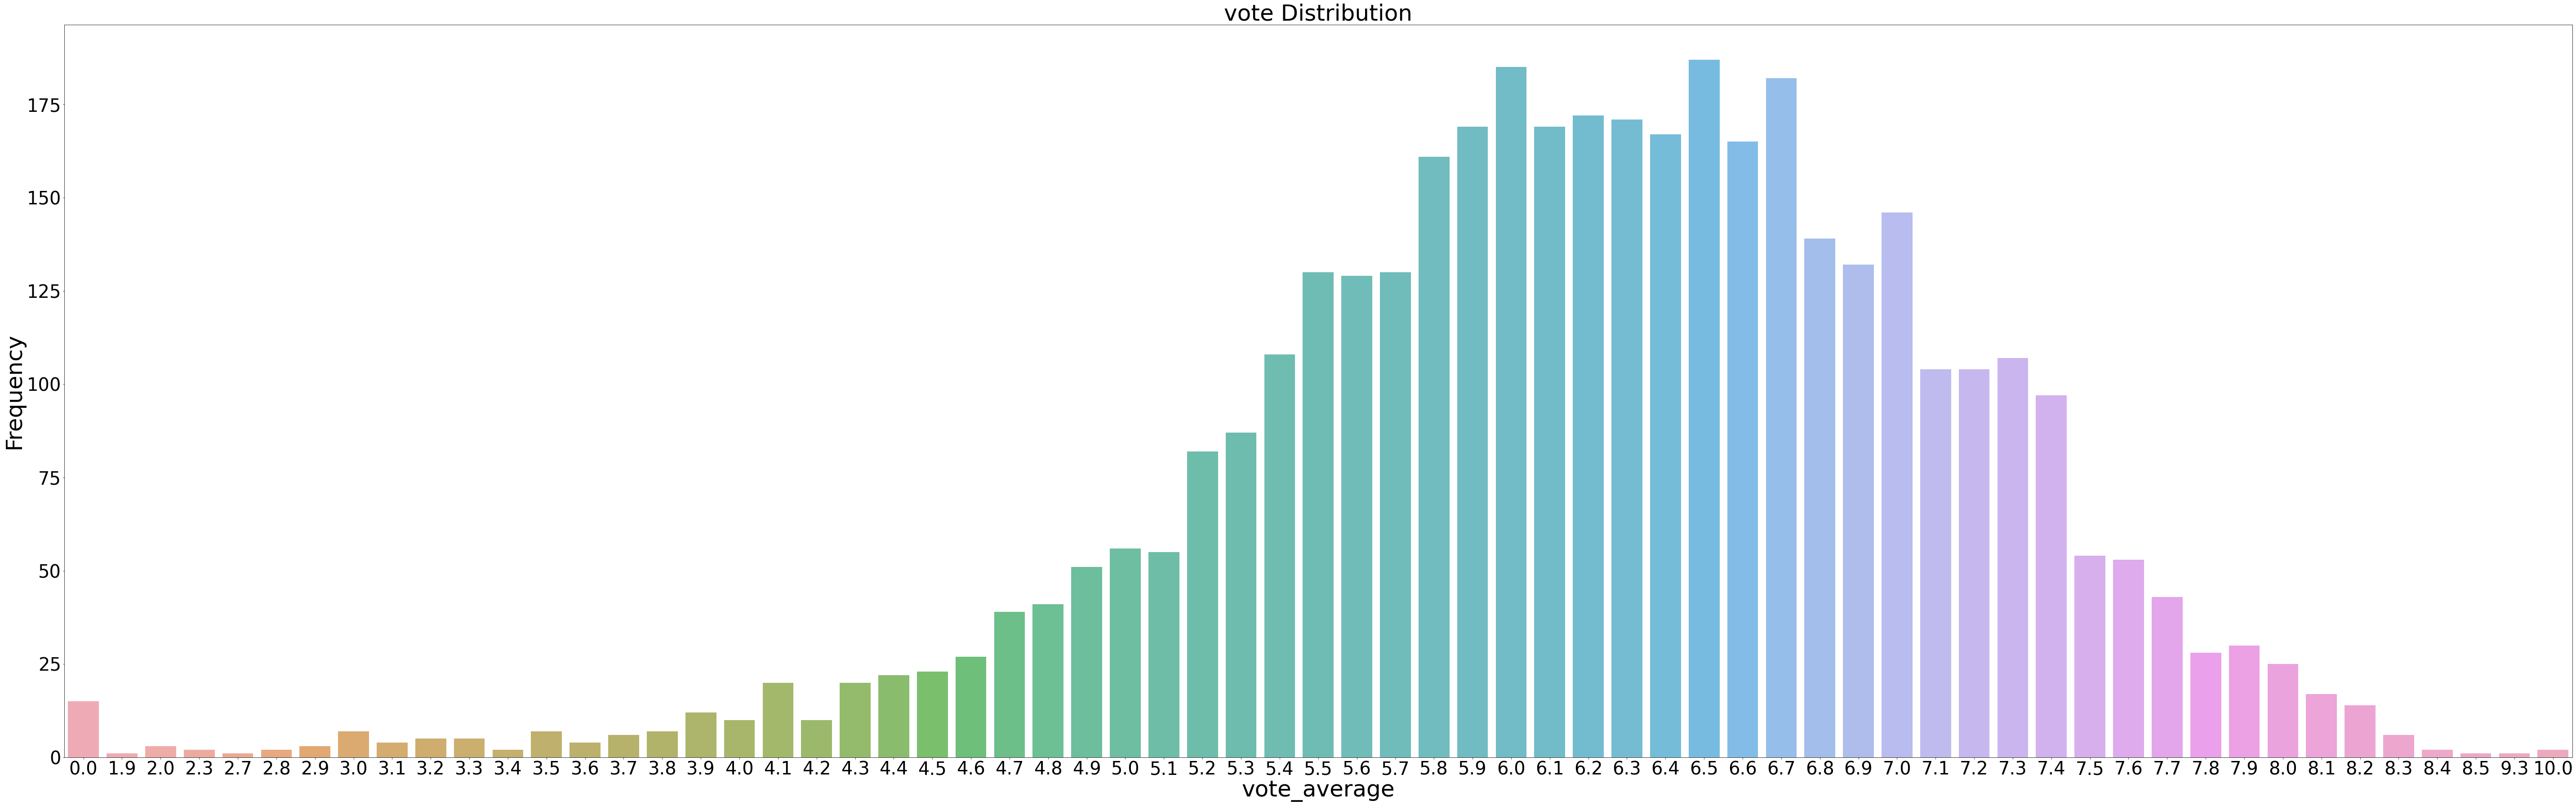

In [408]:
x_rating = rws_new.vote_average.value_counts()
y_rating = x_rating.sort_index()
plt.figure(figsize=(100,30))
sns.barplot(x_rating.index, x_rating.values, alpha=0.8)
plt.title("vote Distribution", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('vote_average', fontsize=50)
plt.xticks(fontsize=40)

In [409]:
words = rws_new['stopwords_removed_tagline']
allwords = []
for wordlist in words:
    allwords += wordlist
print(allwords)

['enter', 'world', 'pandora', '.', 'end', 'world', ',', 'adventure', 'begins', '.', 'plan', 'one', 'escapes', 'legend', 'ends', 'lost', 'world', ',', 'found', 'another', '.', 'battle', 'within', '.', 'taking', 'adventure', 'new', 'lengths', '.', 'new', 'age', 'come', '.', 'dark', 'secrets', 'revealed', 'justice', 'revenge', 'love', ',', 'hate', ',', 'justice', ',', 'revenge', '.', 'jack', 'back', '!', 'never', 'take', 'mask', 'believe', 'man', 'fly', '.', 'hope', 'new', 'face', '.', 'assembly', 'required', '.', 'live', 'forever', 'die', 'trying', '.', 'back', '...', 'time', '.', 'witness', 'defining', 'chapter', 'middle-earth', 'saga', 'untold', 'story', 'begins', '.', 'rise', 'rise', ',', 'lambs', 'become', 'lions', '.', 'beyond', 'darkness', '...', 'beyond', 'desolation', '...', 'lies', 'greatest', 'danger', '.', 'worlds', 'beyond', '-', 'compass', 'show', 'way', '.', 'eighth', 'wonder', 'world', '.', 'nothing', 'earth', 'could', 'come', '.', 'divided', 'fall', 'battle', 'earth', 'be

In [410]:
rws_new['stopwords_removed_tagline_str']

0                                   enter world pandora .
1                          end world , adventure begins .
2                                        plan one escapes
3                                             legend ends
4                            lost world , found another .
                              ...                        
4795                            sometimes got break rules
4796                             happens actually works ?
4798        come looking trouble , trouble came looking .
4799    newlywed couple 's honeymoon upended arrivals ...
4801                                  new yorker shanghai
Name: stopwords_removed_tagline_str, Length: 3959, dtype: object

In [411]:
!pip install wordcloud
from wordcloud import WordCloud
mostcommon = FreqDist(allwords).most_common(50)
print (mostcommon)

[('.', 3663), (',', 709), ('...', 460), ('!', 356), ('one', 301), ('?', 220), ('love', 212), ('life', 187), ('never', 166), ('story', 152), ("'s", 150), ('world', 139), ('man', 137), ('get', 127), ('time', 119), ('every', 97), ('back', 84), ('two', 79), ('new', 78), ('family', 70), ('go', 69), ('everything', 69), ('adventure', 66), ('like', 63), ('true', 62), ('way', 61), ('truth', 60), ('comedy', 59), ('ever', 58), ('first', 58), ('would', 58), ('going', 56), ('know', 55), ('comes', 54), ('change', 51), ('best', 51), ('us', 50), ('little', 50), ('evil', 50), ('last', 50), ('come', 49), ('big', 49), ('take', 48), ('real', 48), ('got', 48), ('sometimes', 48), ('find', 47), ('people', 45), ('future', 44), ('nothing', 43)]


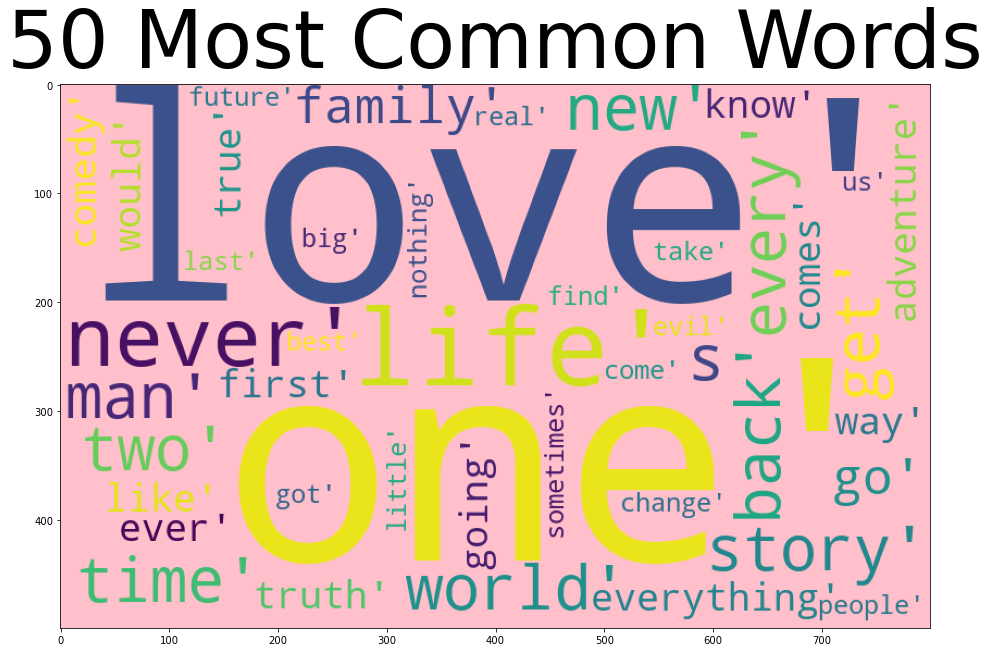

In [412]:
wordcloud = WordCloud(width=800, height=500, background_color='pink').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud)
plt.title('50 Most Common Words', fontsize=80)
plt.show()

In [413]:
###generating TF  vectors
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)
tf = tf_vectorizer.fit_transform(rws_new['stopwords_removed_tagline_str'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()
tagline_vectors = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))

In [414]:
###generating TF vectors
tf_vectorizer_1 = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)
tf_new = tf_vectorizer.fit_transform(rws_new['title_str'].values.astype('U'))
tf_feature_names_new = tf_vectorizer.get_feature_names()
title_vectors = pd.DataFrame(tf_new.toarray(), columns=list(tf_feature_names_new))

In [415]:
tfidf = TfidfVectorizer(analyzer='word', stop_words = 'english')
score = tfidf.fit_transform(rws_new['stopwords_removed_tagline_str'])


In [416]:
tfidf = pd.DataFrame(score.toarray(), columns=tfidf.get_feature_names())

In [417]:
print (tfidf)


      000  007   05   06   08   10  100  1000  1001   11  ...  youth  zebra  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  ...    0.0    0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  ...    0.0    0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  ...    0.0    0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  ...    0.0    0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  ...    0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...   ...   ...  ...  ...    ...    ...   
3954  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  ...    0.0    0.0   
3955  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  ...    0.0    0.0   
3956  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  ...    0.0    0.0   
3957  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  ...    0.0    0.0   
3958  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  ...    0.0    0.0   

      zero  zeta  zhivago  zombies  zone  zoo  zwei

In [448]:
##kmeans clustering
X = rws_new.iloc[:, [3, 14]].values

In [449]:
from sklearn.datasets import make_blobs
X = make_blobs(centers =6,
              n_features = 4,
              cluster_std = 1.6,
              random_state = 50)


In [450]:
points = X[0]

In [451]:
##import kmeans
from sklearn.cluster import KMeans

In [452]:
##create a kmeans object
kmeans = KMeans (n_clusters =6)

In [453]:
kmeans.fit(points)

KMeans(n_clusters=6)

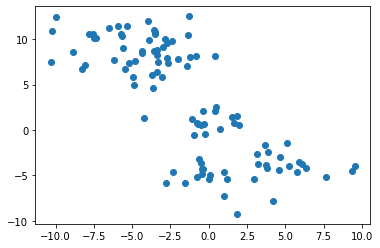

In [454]:
plt.scatter (X[0][:,0], X[0][:,1])

In [455]:
clusters = kmeans.cluster_centers_

In [456]:
print (clusters)

[[-3.5575763   7.67840557  3.04004921 -2.57709609]
 [-2.87045798  9.05644236 -1.65248497  5.50108645]
 [ 5.32519172 -3.81026049 -3.67643292 -3.15333309]
 [-0.03000629  0.95115928  8.91335919  0.62078216]
 [-7.3292744   9.74015814  8.38902303  0.9332413 ]
 [-0.09442687 -5.26313316 -4.68967142 -2.43280087]]


In [457]:
y_km = kmeans.fit_predict(points)

C:\Users\Latika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Latika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Latika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Latika\ana

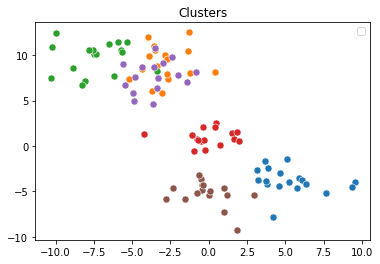

In [458]:

sns.scatterplot(points[y_km == 0, 0], points[y_km == 0, 1],s=50)
sns.scatterplot(points[y_km == 1, 0], points[y_km == 1, 1],s=50)
sns.scatterplot(points[y_km == 2, 0], points[y_km == 2, 1],s=50)
sns.scatterplot(points[y_km == 3, 0], points[y_km == 3, 1],s=50)
sns.scatterplot(points[y_km == 4, 0], points[y_km == 4, 1],s=50)
sns.scatterplot(points[y_km == 5, 0], points[y_km == 5, 1],s=50)
sns.scatterplot(points[y_km == 6, 0], points[y_km == 6, 1],s=50)
plt.title('Clusters')
plt.legend()
plt.show()

In [459]:
labels = kmeans.labels_

In [460]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 5.32519172 -3.81026049 -3.67643292 -3.15333309]
 [-2.87045798  9.05644236 -1.65248497  5.50108645]
 [-7.3292744   9.74015814  8.38902303  0.9332413 ]
 [-0.03000629  0.95115928  8.91335919  0.62078216]
 [-3.5575763   7.67840557  3.04004921 -2.57709609]
 [-0.09442687 -5.26313316 -4.68967142 -2.43280087]]


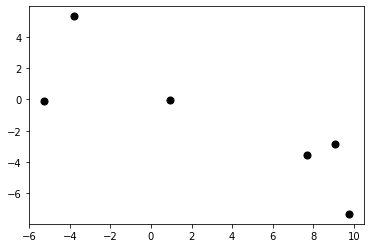

In [461]:
plt.scatter(centroids[:, 1], centroids[:, 0], c='black', s=50)


In [462]:
##as the column lenght is th same as the all of the columns
rws_new['clusters'] = pd.Series(y_km)

<ipython-input-462-5416e592cd8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rws_new['clusters'] = pd.Series(y_km)


In [463]:
rws_new.head(40)

,tagline,title,vote_average,genres,no_contract,tagline_str,tokenized_tagline,lower_tagline,no_contract_title,title_str,tokenized_title,lower_title,stopwords_removed_tagline,stopwords_removed_title,stopwords_removed_tagline_str,clusters
0,Enter the World of Pandora.,Avatar,7.2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Enter, the, World, of, Pandora.]",Enter the World of Pandora.,"[Enter, the, World, of, Pandora, .]","[enter, the, world, of, pandora, .]",[Avatar],Avatar,[Avatar],[avatar],"[enter, world, pandora, .]",[avatar],enter world pandora .,1.0
1,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[At, the, end, of, the, world,, the, adventure...","At the end of the world, the adventure begins.","[At, the, end, of, the, world, ,, the, adventu...","[at, the, end, of, the, world, ,, the, adventu...","[Pirates, of, the, Caribbean:, At, World's, End]",Pirates of the Caribbean: At World's End,"[Pirates, of, the, Caribbean, :, At, World, 's...","[pirates, of, the, caribbean, :, at, world, 's...","[end, world, ,, adventure, begins, .]","[pirates, caribbean, :, world, 's, end]","end world , adventure begins .",0.0
2,A Plan No One Escapes,Spectre,6.3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[A, Plan, No, One, Escapes]",A Plan No One Escapes,"[A, Plan, No, One, Escapes]","[a, plan, no, one, escapes]",[Spectre],Spectre,[Spectre],[spectre],"[plan, one, escapes]",[spectre],plan one escapes,2.0
3,The Legend Ends,The Dark Knight Rises,7.6,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[The, Legend, Ends]",The Legend Ends,"[The, Legend, Ends]","[the, legend, ends]","[The, Dark, Knight, Rises]",The Dark Knight Rises,"[The, Dark, Knight, Rises]","[the, dark, knight, rises]","[legend, ends]","[dark, knight, rises]",legend ends,1.0
4,"Lost in our world, found in another.",John Carter,6.1,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Lost, in, our, world,, found, in, another.]","Lost in our world, found in another.","[Lost, in, our, world, ,, found, in, another, .]","[lost, in, our, world, ,, found, in, another, .]","[John, Carter]",John Carter,"[John, Carter]","[john, carter]","[lost, world, ,, found, another, .]","[john, carter]","lost world , found another .",3.0
5,The battle within.,Spider-Man 3,5.9,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...","[The, battle, within.]",The battle within.,"[The, battle, within, .]","[the, battle, within, .]","[Spider-Man, 3]",Spider-Man 3,"[Spider-Man, 3]","[spider-man, 3]","[battle, within, .]","[spider-man, 3]",battle within .,1.0
6,They're taking adventure to new lengths.,Tangled,7.4,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...","[They are, taking, adventure, to, new, lengths.]",They are taking adventure to new lengths.,"[They, are, taking, adventure, to, new, length...","[they, are, taking, adventure, to, new, length...",[Tangled],Tangled,[Tangled],[tangled],"[taking, adventure, new, lengths, .]",[tangled],taking adventure new lengths .,1.0
7,A New Age Has Come.,Avengers: Age of Ultron,7.3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[A, New, Age, Has, Come.]",A New Age Has Come.,"[A, New, Age, Has, Come, .]","[a, new, age, has, come, .]","[Avengers:, Age, of, Ultron]",Avengers: Age of Ultron,"[Avengers, :, Age, of, Ultron]","[avengers, :, age, of, ultron]","[new, age, come, .]","[avengers, :, age, ultron]",new age come .,0.0
8,Dark Secrets Revealed,Harry Potter and the Half-Blood Prince,7.4,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[Dark, Secrets, Revealed]",Dark Secrets Revealed,"[Dark, Secrets, Revealed]","[dark, secrets, revealed]","[Harry, Potter, and, the, Half-Blood, Prince]",Harry Potter and the Half-Blood Prince,"[Harry, Potter, and, the, Half-Blood, Prince]","[harry, potter, and, the, half-blood, prince]","[dark, secrets, revealed]","[harry, potter, half

In [464]:
rws_new[rws_new['title']=='Avatar']

,tagline,title,vote_average,genres,no_contract,tagline_str,tokenized_tagline,lower_tagline,no_contract_title,title_str,tokenized_title,lower_title,stopwords_removed_tagline,stopwords_removed_title,stopwords_removed_tagline_str,clusters
0,Enter the World of Pandora.,Avatar,7.2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Enter, the, World, of, Pandora.]",Enter the World of Pandora.,"[Enter, the, World, of, Pandora, .]","[enter, the, world, of, pandora, .]",[Avatar],Avatar,[Avatar],[avatar],"[enter, world, pandora, .]",[avatar],enter world pandora .,1.0


In [505]:
#Find other movies for cluster 
rws_new[rws_new['clusters']==1]

,tagline,title,vote_average,genres,no_contract,tagline_str,tokenized_tagline,lower_tagline,no_contract_title,title_str,tokenized_title,lower_title,stopwords_removed_tagline,stopwords_removed_title,stopwords_removed_tagline_str,clusters
0,Enter the World of Pandora.,Avatar,7.2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Enter, the, World, of, Pandora.]",Enter the World of Pandora.,"[Enter, the, World, of, Pandora, .]","[enter, the, world, of, pandora, .]",[Avatar],Avatar,[Avatar],[avatar],"[enter, world, pandora, .]",[avatar],enter world pandora .,1.0
3,The Legend Ends,The Dark Knight Rises,7.6,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[The, Legend, Ends]",The Legend Ends,"[The, Legend, Ends]","[the, legend, ends]","[The, Dark, Knight, Rises]",The Dark Knight Rises,"[The, Dark, Knight, Rises]","[the, dark, knight, rises]","[legend, ends]","[dark, knight, rises]",legend ends,1.0
5,The battle within.,Spider-Man 3,5.9,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...","[The, battle, within.]",The battle within.,"[The, battle, within, .]","[the, battle, within, .]","[Spider-Man, 3]",Spider-Man 3,"[Spider-Man, 3]","[spider-man, 3]","[battle, within, .]","[spider-man, 3]",battle within .,1.0
6,They're taking adventure to new lengths.,Tangled,7.4,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...","[They are, taking, adventure, to, new, lengths.]",They are taking adventure to new lengths.,"[They, are, taking, adventure, to, new, length...","[they, are, taking, adventure, to, new, length...",[Tangled],Tangled,[Tangled],[tangled],"[taking, adventure, new, lengths, .]",[tangled],taking adventure new lengths .,1.0
9,Justice or revenge,Batman v Superman: Dawn of Justice,5.7,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Justice, or, revenge]",Justice or revenge,"[Justice, or, revenge]","[justice, or, revenge]","[Batman, v, Superman:, Dawn, of, Justice]",Batman v Superman: Dawn of Justice,"[Batman, v, Superman, :, Dawn, of, Justice]","[batman, v, superman, :, dawn, of, justice]","[justice, revenge]","[batman, v, superman, :, dawn, justice]",justice revenge,1.0
20,The untold story begins.,The Amazing Spider-Man,6.5,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[The, untold, story, begins.]",The untold story begins.,"[The, untold, story, begins, .]","[the, untold, story, begins, .]","[The, Amazing, Spider-Man]",The Amazing Spider-Man,"[The, Amazing, Spider-Man]","[the, amazing, spider-man]","[untold, story, begins, .]","[amazing, spider-man]",untold story begins .,1.0
25,Nothing on Earth could come between them.,Titanic,7.5,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...","[Nothing, on, Earth, could, come, between, them.]",Nothing on Earth could come between them.,"[Nothing, on, Earth, could, come, between, the...","[nothing, on, earth, could, come, between, the...",[Titanic],Titanic,[Titanic],[titanic],"[nothing, earth, could, come, .]",[titanic],nothing earth could come .,1.0
26,Divided We Fall,Captain America: Civil War,7.1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...","[Divided, We, Fall]",Divided We Fall,"[Divided, We, Fall]","[divided, we, fall]","[Captain, America:, Civil, War]",Captain America: Civil War,"[Captain, America, :, Civil, War]","[captain, america, :, civil, war]","[divided, fall]","[captain, america, :, civil, war]",divided fall,1.0
42,No toy gets left behind.,Toy Story 3,7.6,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...","[No, toy, gets, left, behind.]",No toy gets left behind.,"[No, toy, gets, left, behind, .]","[no, toy, gets, left, behind, .]","[Toy, Story, 3]",Toy Story 3,"[Toy, Story, 3]","[toy, story, 3]","[toy, gets, left, behind, .]","[toy, story, 3]",toy gets left behind .,1.0
61,Expand your universe.,Jupiter Ascending,5.2,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...","[Expand, your, universe.]",Expand your universe.,"[Expand, your, universe, .]","[expand, your, universe, 

In [510]:
rws_new[rws_new['clusters']==2]

,tagline,title,vote_average,genres,no_contract,tagline_str,tokenized_tagline,lower_tagline,no_contract_title,title_str,tokenized_title,lower_title,stopwords_removed_tagline,stopwords_removed_title,stopwords_removed_tagline_str,clusters
2,A Plan No One Escapes,Spectre,6.3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[A, Plan, No, One, Escapes]",A Plan No One Escapes,"[A, Plan, No, One, Escapes]","[a, plan, no, one, escapes]",[Spectre],Spectre,[Spectre],[spectre],"[plan, one, escapes]",[spectre],plan one escapes,2.0
21,"Rise and rise again, until lambs become lions.",Robin Hood,6.2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Rise, and, rise, again,, until, lambs, become...","Rise and rise again, until lambs become lions.","[Rise, and, rise, again, ,, until, lambs, beco...","[rise, and, rise, again, ,, until, lambs, beco...","[Robin, Hood]",Robin Hood,"[Robin, Hood]","[robin, hood]","[rise, rise, ,, lambs, become, lions, .]","[robin, hood]","rise rise , lambs become lions .",2.0
24,The eighth wonder of the world.,King Kong,6.6,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...","[The, eighth, wonder, of, the, world.]",The eighth wonder of the world.,"[The, eighth, wonder, of, the, world, .]","[the, eighth, wonder, of, the, world, .]","[King, Kong]",King Kong,"[King, Kong]","[king, kong]","[eighth, wonder, world, .]","[king, kong]",eighth wonder world .,2.0
30,There's a hero in all of us.,Spider-Man 2,6.7,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[There is, a, hero, in, all, of, us.]",There is a hero in all of us.,"[There, is, a, hero, in, all, of, us, .]","[there, is, a, hero, in, all, of, us, .]","[Spider-Man, 2]",Spider-Man 2,"[Spider-Man, 2]","[spider-man, 2]","[hero, us, .]","[spider-man, 2]",hero us .,2.0
32,You're invited to a very important date.,Alice in Wonderland,6.4,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 14, ""...","[You are, invited, to, a, very, important, date.]",You are invited to a very important date.,"[You, are, invited, to, a, very, important, da...","[you, are, invited, to, a, very, important, da...","[Alice, in, Wonderland]",Alice in Wonderland,"[Alice, in, Wonderland]","[alice, in, wonderland]","[invited, important, date, .]","[alice, wonderland]",invited important date .,2.0
50,Defy the Future,Prince of Persia: The Sands of Time,6.2,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[Defy, the, Future]",Defy the Future,"[Defy, the, Future]","[defy, the, future]","[Prince, of, Persia:, The, Sands, of, Time]",Prince of Persia: The Sands of Time,"[Prince, of, Persia, :, The, Sands, of, Time]","[prince, of, persia, :, the, sands, of, time]","[defy, future]","[prince, persia, :, sands, time]",defy future,2.0
57,An adventure beyond the ordinar-E.,WALL·E,7.8,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...","[An, adventure, beyond, the, ordinar-E.]",An adventure beyond the ordinar-E.,"[An, adventure, beyond, the, ordinar-E, .]","[an, adventure, beyond, the, ordinar-e, .]",[WALL·E],WALL·E,[WALL·E],[wall·e],"[adventure, beyond, ordinar-e, .]",[wall·e],adventure beyond ordinar-e .,2.0
59,We Were Warned.,2012,5.6,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[We, Were, Warned.]",We Were Warned.,"[We, Were, Warned, .]","[we, were, warned, .]",[2012],2012,[2012],[2012],"[warned, .]",[2012],warned .,2.0
65,Why So Serious?,The Dark Knight,8.2,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...","[Why, So, Serious?]",Why So Serious?,"[Why, So, Serious, ?]","[why, so, serious, ?]","[The, Dark, Knight]",The Dark Knight,"[The, Dark, Knight]","[the, dark, knight]","[serious, ?]","[dark, knight]",serious ?,2.0
68,Heroes aren't born. They're built.,Iron Man,7.4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...","[Heroes, are not, born., They are, built.]",Heroes are not born. They are built.,"[Heroes, are, not, born, ., They, are, built, .]","[heroes, are, not, born, ., they, are, built, .]","[Iron, 

In [506]:
## using gensim to conduct word2vec
from nltk.tokenize import RegexpTokenizer
tagline_list = list()
tagline_lines = rws_new['tagline'].values.tolist()
for line in tagline_lines:


    rem_tok_punc = RegexpTokenizer(r'\w+')

    tokens = rem_tok_punc.tokenize(line)

    words = [w.lower() for w in tokens]


    stop_word_list = set(stopwords.words('english'))


    words = [w for w in words if not w in stop_word_list]


    tagline_list.append(words)
len(tagline_list)


3959

In [507]:
import gensim

model = gensim.models.Word2Vec(sentences = review_data_list, workers = 4, min_count = 1)

In [508]:
 words = list(model.wv.index_to_key)

In [509]:
model.wv.most_similar('adventure')

[('one', 0.7504357695579529),
 ('man', 0.7091822028160095),
 ('get', 0.6655921339988708),
 ('story', 0.6511979103088379),
 ('life', 0.6487846970558167),
 ('love', 0.643971860408783),
 ('world', 0.6436696648597717),
 ('truth', 0.6324296593666077),
 ('heart', 0.6239457726478577),
 ('people', 0.6216975450515747)]